In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('./data/agri.csv')

In [3]:
df.shape

(345407, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345407 entries, 0 to 345406
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             345407 non-null  object 
 1   District          345407 non-null  object 
 2   Crop              345375 non-null  object 
 3   Year              345407 non-null  object 
 4   Season            345406 non-null  object 
 5   Area              345374 non-null  float64
 6   Area Units        345407 non-null  object 
 7   Production        340414 non-null  float64
 8   Production Units  345407 non-null  object 
 9   Yield             345374 non-null  float64
dtypes: float64(3), object(7)
memory usage: 26.4+ MB


In [5]:
df.head()

State                  District      Crop     Year  \
0  Andaman and Nicobar Islands                  NICOBARS  Arecanut  2001-02   
1  Andaman and Nicobar Islands                  NICOBARS  Arecanut  2002-03   
2  Andaman and Nicobar Islands                  NICOBARS  Arecanut  2003-04   
3  Andaman and Nicobar Islands  NORTH AND MIDDLE ANDAMAN  Arecanut  2001-02   
4  Andaman and Nicobar Islands            SOUTH ANDAMANS  Arecanut  2002-03   

       Season    Area Area Units  Production Production Units     Yield  
0      Kharif  1254.0    Hectare      2061.0           Tonnes  1.643541  
1  Whole Year  1258.0    Hectare      2083.0           Tonnes  1.655803  
2  Whole Year  1261.0    Hectare      1525.0           Tonnes  1.209358  
3      Kharif  3100.0    Hectare      5239.0           Tonnes  1.690000  
4  Whole Year  3105.0    Hectare      5267.0           Tonnes  1.696296

In [6]:
df.isnull().sum()

State                  0
District               0
Crop                  32
Year                   0
Season                 1
Area                  33
Area Units             0
Production          4993
Production Units       0
Yield                 33
dtype: int64

In [7]:
df['Production Units'].value_counts()

Production Units
Tonnes    331686
Bales      10794
Nuts        2927
Name: count, dtype: int64

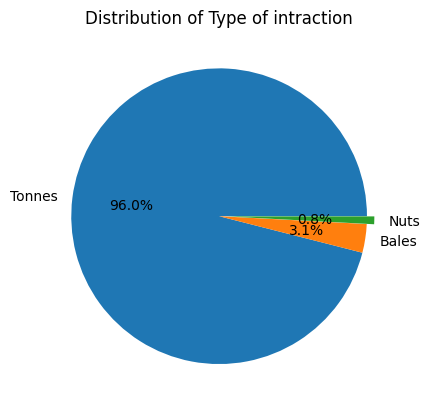

In [8]:

df['Production Units'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=['Tonnes','Bales','Nuts'],explode=[0,0,0.05])
plt.ylabel(' ')
plt.title('Distribution of Type of intraction')
plt.show()

Removing all the rows where yeild is not in Tonnes

In [9]:
# Filter the DataFrame
filtered_data = df[df['Production Units'] == 'Tonnes']

# Reset index if needed
filtered_data.reset_index(drop=True, inplace=True)


In [10]:
df.shape

(345407, 10)

In [11]:
df.isnull().sum()

State                  0
District               0
Crop                  32
Year                   0
Season                 1
Area                  33
Area Units             0
Production          4993
Production Units       0
Yield                 33
dtype: int64

In [12]:
df=df.dropna()

In [13]:
df.isnull().sum()

State               0
District            0
Crop                0
Year                0
Season              0
Area                0
Area Units          0
Production          0
Production Units    0
Yield               0
dtype: int64

In [14]:
df.shape

(340414, 10)

In [15]:
unique_values = df['State'].unique()
print(unique_values)


['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Daman and Diu' 'Delhi' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu and Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' 'Telangana' 'Laddakh']


In [16]:
df.dropna(inplace=True)

In [17]:
unique_data_dict = {}

# Iterate over each column
for column in df.columns:
    # Find unique values for the column
    unique_values = df[column].unique()
    # Store unique values in the dictionary
    unique_data_dict[column] = unique_values.tolist()

# Print the dictionary
print(unique_data_dict)


{'State': ['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Telangana', 'Laddakh'], 'District': ['NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS', 'ANANTAPUR', 'EAST GODAVARI', 'KRISHNA', 'VIZIANAGARAM', 'WEST GODAVARI', 'ADILABAD', 'CHITTOOR', 'GUNTUR', 'KADAPA', 'KARIMNAGAR', 'KHAMMAM', 'KURNOOL', 'MAHBUBNAGAR', 'MEDAK', 'NALGONDA', 'NIZAMABAD', 'PRAKASAM', 'RANGAREDDI', 'SPSR NELLORE', 'SRIKAKULAM', 'VISAKHAPATANAM', 'WARANGAL', 'CHANGLANG', 'DIBANG VALLEY', 'EAST KAMENG', 'EAST SIANG', 'KURUNG KUMEY', 'LOHIT', 'LOWER DIBANG VALLEY', 'LOWER SUBAN

In [18]:
unique_values = df['Area Units'].unique()
print(unique_values)

['Hectare']


In [19]:
# Replace the pattern "2001-02" with "2001" in the 'Year' column
df['Year'] = df['Year'].str.replace(r'^(\d{4})-\d{2}$', r'\1', regex=True)

# Print the modified DataFrame


                              State                  District      Crop  Year  \
0       Andaman and Nicobar Islands                  NICOBARS  Arecanut  2001   
1       Andaman and Nicobar Islands                  NICOBARS  Arecanut  2002   
2       Andaman and Nicobar Islands                  NICOBARS  Arecanut  2003   
3       Andaman and Nicobar Islands  NORTH AND MIDDLE ANDAMAN  Arecanut  2001   
4       Andaman and Nicobar Islands            SOUTH ANDAMANS  Arecanut  2002   
...                             ...                       ...       ...   ...   
345370                  West Bengal           PURBA BARDHAMAN     Wheat  2000   
345371                  West Bengal                   PURULIA     Wheat  1997   
345372                  West Bengal                   PURULIA     Wheat  1998   
345373                  West Bengal                   PURULIA     Wheat  1999   
345374                  West Bengal                   PURULIA     Wheat  2000   

            Season    Area 

In [20]:
df.head()

State                  District      Crop  Year  \
0  Andaman and Nicobar Islands                  NICOBARS  Arecanut  2001   
1  Andaman and Nicobar Islands                  NICOBARS  Arecanut  2002   
2  Andaman and Nicobar Islands                  NICOBARS  Arecanut  2003   
3  Andaman and Nicobar Islands  NORTH AND MIDDLE ANDAMAN  Arecanut  2001   
4  Andaman and Nicobar Islands            SOUTH ANDAMANS  Arecanut  2002   

       Season    Area Area Units  Production Production Units     Yield  
0      Kharif  1254.0    Hectare      2061.0           Tonnes  1.643541  
1  Whole Year  1258.0    Hectare      2083.0           Tonnes  1.655803  
2  Whole Year  1261.0    Hectare      1525.0           Tonnes  1.209358  
3      Kharif  3100.0    Hectare      5239.0           Tonnes  1.690000  
4  Whole Year  3105.0    Hectare      5267.0           Tonnes  1.696296

In [23]:
df.drop(columns=["Area Units","Production Units"], axis=1,inplace=True)

In [24]:
df.head()

State                  District      Crop  Year  \
0  Andaman and Nicobar Islands                  NICOBARS  Arecanut  2001   
1  Andaman and Nicobar Islands                  NICOBARS  Arecanut  2002   
2  Andaman and Nicobar Islands                  NICOBARS  Arecanut  2003   
3  Andaman and Nicobar Islands  NORTH AND MIDDLE ANDAMAN  Arecanut  2001   
4  Andaman and Nicobar Islands            SOUTH ANDAMANS  Arecanut  2002   

       Season    Area  Production     Yield  
0      Kharif  1254.0      2061.0  1.643541  
1  Whole Year  1258.0      2083.0  1.655803  
2  Whole Year  1261.0      1525.0  1.209358  
3      Kharif  3100.0      5239.0  1.690000  
4  Whole Year  3105.0      5267.0  1.696296